In [25]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader as web

In [26]:
df = pd.read_csv(r'C:\Users\jonga\OneDrive\Desktop\Gamma.csv', index_col = 0)

In [27]:
df.head()

,SPX,DIX,GEX,VIX,Gamma,Delta,Cross
Date,,,,,,,
1/2/2018,2694.0,35.865943,5104.672300,9.77,2418.16700,14130.99233,0.0
1/3/2018,2713.0,36.173135,6227.584426,9.15,3327.51793,14957.67191,0.0
1/4/2018,2725.0,37.965179,6817.650988,9.22,3698.66400,15937.18248,0.0
1/5/2018,2739.0,37.649259,6572.707311,9.22,3377.86288,16591.83141,0.0
1/8/2018,2748.0,38.206735,6870.883579,9.52,3432.58442,17172.74024,0.0


In [28]:
df['SPX%'] = df['SPX'].pct_change()
df['VIX%'] = df['VIX'].pct_change()

In [29]:
df['position'] = np.where(df['Gamma'] > 0, 1,0)

In [30]:
df['Strategy Pct'] = df['SPX%'] * df['position']

In [31]:
df['Long Gamma'] = (df['Strategy Pct'] + 1).cumprod()

In [32]:
df['position2'] = np.where(df['Cross'] == 1,1, 0)

In [33]:
df['Strategy Pct2'] = df['VIX%'] * df['position2']

In [34]:
df['Long VIX'] = (df['Strategy Pct2'] +1).cumprod()

In [35]:
df['Buy & Hold'] = (df['SPX'].pct_change(1) + 1 ).cumprod()

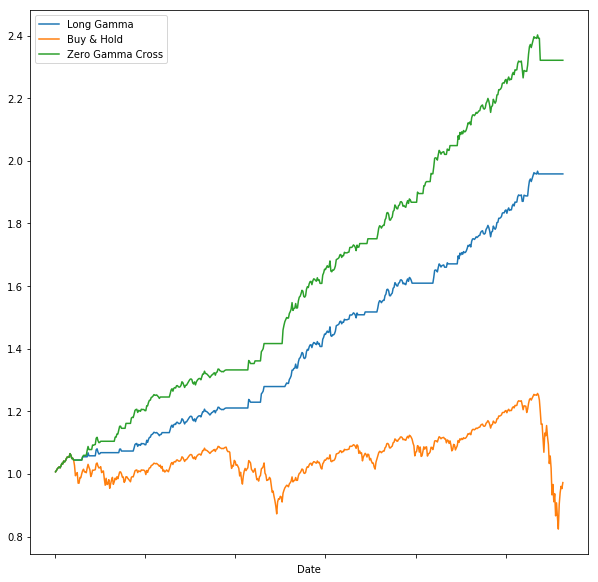

In [44]:
df[['Long Gamma', 'Buy & Hold','Zero Gamma Cross']].plot(figsize = (10,10))

In [37]:
df['Crossing'] = np.where(df['Cross'] == 0, 1,0)

In [38]:
df['Cross Pct'] = df['SPX%'] * df['Crossing']

In [39]:
df['Zero Gamma Cross'] = (df['Cross Pct'] + 1).cumprod()

In [40]:
### Portfolio

In [41]:
port = ['TLT', 'GLD', '^VIX']

vol = web.DataReader(port, data_source = 'yahoo', start = '2018-01-02', end = '2020-03-20')['Adj Close']

In [42]:
#convert daily price in daily returns

returns = vol.pct_change()

#mean daily returns

mean_daily_returns = returns.mean()
cov_matrics = returns.cov()

#weights 

weights = np.asarray([.5,.25,.15,])

In [43]:
#calculate annualized return
portfolio_returns = round(np.sum(mean_daily_returns * weights) *252,2)

portfolio_returns

0.37